In [1]:
### The Import Department 
import networkx as nx
import math
import scipy
import scipy.integrate as spi
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import itertools
import random
%matplotlib inline

# Graphs and Linear Algebra

Recall that the adjacency matrix of an undirected graph has $A_{i,j} = 1$ if and only if nodes $i$ and $j$ are adjacent. Also, recall that a graph is **regular** with degree $k$ if every node has $k$ neighbors. We also say that the graph is $k$-regular. Finally, for shorthand, we say that the eigenvalues of a graph are the eigenvalues of its adjacency matrix.

**a)** Find three graphs with more than five nodes that are 2-regular, 3-regular, and 4-regular. Represent these in `networkx`, draw them, and find their adjacency matrices. These will be running examples for this problem.

**b)** Find the eigenvalues of the three examples, along with the multiplicities of the eigenvalues.

**c)** Show that if $G$ is $k$-regular, then $k$ is an eigenvalue of $G$. 

**d)** Show that $G$ is $k$-regular and connected, then the eigenvalue $k$ of $G$ has multiplicity one. 

**e)** Show that $G$ is $k$-regular then $|\lambda|\leq k$ for any eigenvalue $\lambda$ of $G$. 

**f)** Let $J$ be the matrix of all ones and $A$ be the adjacency matrix of a $k$-regular graph. Show that $AJ = JA=kJ$. 

**g)** Show by construction that there exists regular graph with least eigenvalue equal to $-2$. 

**h)** Show that the following graph, called the Petersen Graph, is $3$-regular by finding its eigenvalues. 

<img src="https://www.researchgate.net/profile/Paul_Wenger/publication/45714891/figure/fig1/AS:669480808091681@1536628071715/The-Petersen-graph.png" width=20%>

**i)** Show that if both $n \geq k+1$ and $nk$ is even, then there exists a $k$-regular graph of size $n$. 

### Question (a)

Text(0.5, 1.0, '4-Regular')

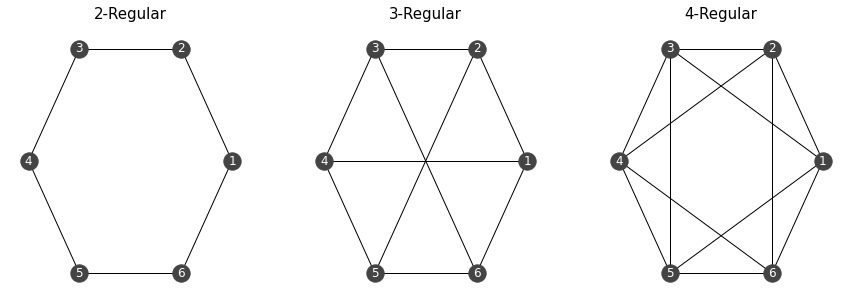

In [2]:
G = nx.Graph()
H = nx.Graph()
I = nx.Graph()

num_list = [1,2,3,4,5,6]
edge_two = [(1,2), (1,6), (2,3), (3,4), (4,5),(5,6)]
edge_three = [(1,2), (1,6),(1,4),(2,3),(2,5), (3,4),(3,6),(4,5),(5,6)]
edge_four = [(1,2),(1,3),(1,5),(1,6),(2,3),(2,6),(2,4),(3,4),(3,5),(4,5),(4,6),(5,6)]

#adding all the numbers as node: 2-Regular
G.add_nodes_from(num_list)
G.add_edges_from(edge_two)

#adding all the numbers as node: 3-Regular
H.add_nodes_from(num_list)
H.add_edges_from(edge_three)

#adding all the numbers as node: 4-Regular
I.add_nodes_from(num_list)
I.add_edges_from(edge_four)


basic_graph,ax = plt.subplots(1,3,figsize = (15,5))
nx.draw(G,
        ax=ax[0], 
        pos=nx.kamada_kawai_layout(G),
        with_labels=True, 
        node_color='#444444',
        font_color="white")

ax[0].set_title("2-Regular", size = 15)

nx.draw(H,
        ax=ax[1], 
        pos=nx.kamada_kawai_layout(H),
        with_labels=True, 
        node_color='#444444',
        font_color="white")
ax[1].set_title("3-Regular", size = 15)

nx.draw(I,
        ax=ax[2], 
        pos=nx.kamada_kawai_layout(I),
        with_labels=True, 
        node_color='#444444',
        font_color="white")
ax[2].set_title("4-Regular", size = 15)

**Adjacency Matrix for 2-Regular graph with 6 nodes:**
$$
A_2 = \begin{pmatrix}
0 & 1 & 0 & 0 & 0 & 1 \\
1 & 0 & 1 & 0 & 0 & 0 \\
0 & 1 & 0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 & 0 & 1 \\
1 & 0 & 0 & 0 & 1 & 0 \\
\end{pmatrix}
$$

**Adjacency Matrix for 3-Regular graph with 6 nodes:**
$$
A_3 = \begin{pmatrix}
0 & 1 & 0 & 1 & 0 & 1 \\
1 & 0 & 1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 & 0 & 1 \\
1 & 0 & 1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 & 0 & 1 \\
1 & 0 & 1 & 0 & 1 & 0 \\
\end{pmatrix}
$$

**Adjacency Matrix for 4-Regular graph with 6 nodes:**
$$
A_4 = \begin{pmatrix}
0 & 1 & 1 & 0 & 1 & 1 \\
1 & 0 & 1 & 1 & 0 & 1 \\
1 & 1 & 0 & 1 & 1 & 0 \\
0 & 1 & 1 & 0 & 1 & 1 \\
1 & 0 & 1 & 1 & 0 & 1 \\
1 & 1 & 0 & 1 & 1 & 0 \\
\end{pmatrix}
$$

### Question (b)

In [3]:
def multiplicity(alist):
    """
    takes list as input, count repeatation of each number in the list.  
    returns dictionary of form (eig: multiplicity)
    """
    temp = np.unique(np.round(alist))
    print("Unique eigen values are: ",temp)
    apna_dict = dict.fromkeys(temp, [])
    for i in range(len(temp)):
        count = 0                     # temporary count of eigen value
        for j in range(len(alist)):
            if (temp[i] == alist[j]):
                count = count + 1
        apna_dict[temp[i]] = count
    return apna_dict
                
def sym(a):
    """
    check if matrix is symmetric
    """
    b = a.T
    if b.all()==a.all():
        print("Symmetric")
    else:
        print('Not Symmetric')
        
## adjacency matrix of 2-regular graph with 6 nodes
adj_matrix_two = np.matrix([
    [0,1,0,0,0,1],
    [1,0,1,0,0,0],
    [0,1,0,1,0,0],
    [0,0,1,0,1,0],
    [0,0,0,1,0,1],
    [1,0,0,0,1,0]])

## adjacency matrix of 3-regular graph with 6 nodes
adj_matrix_three = np.matrix([
    [0,1,0,1,0,1],
    [1,0,1,0,1,0],
    [0,1,0,1,0,1],
    [1,0,1,0,1,0],
    [0,1,0,1,0,1],
    [1,0,1,0,1,0]])

## adjacency matrix of 4-regular graph with 6 nodes
adj_matrix_four = np.matrix([
    [0,1,1,0,1,1],
    [1,0,1,1,0,1],
    [1,1,0,1,1,0],
    [0,1,1,0,1,1],
    [1,0,1,1,0,1],
    [1,1,0,1,1,0]])

### Calculate eigen values of the Adjacency Matrix
eig_two = np.linalg.eigvals(adj_matrix_two)           # eigen value of 2-regular graph
eig_three = np.linalg.eigvals(adj_matrix_three)       # eigen value of 3-regular graph
eig_four = np.linalg.eigvals(adj_matrix_four)         # eigen value of 4-regular graph

### rounding eigen values to get more legible information
eig_two = np.round(eig_two)
eig_three = np.round(eig_three)
eig_four = np.round(eig_four)

print('\033[1m'"For 2-regular graph with 6 nodes"'\033[0m')
print("Eigen values are: ",eig_two)
print("Multiplicty of eigen values:",multiplicity(eig_two))

print('\033[1m'"\nFor 3-regular graph with 6 nodes"'\033[0m')
print("Eigen values are: ",eig_three)
print("Multiplicty of eigen values:",multiplicity(eig_three))

print('\033[1m'"\nFor 4-regular graph with 6 nodes"'\033[0m')
print("Eigen values are: ",eig_four)
print("Multiplicty of eigen values:",multiplicity(eig_four))

For 2-regular graph with 6 nodes
Eigen values are:  [-2.  2.  1. -1. -1.  1.]
Unique eigen values are:  [-2. -1.  1.  2.]
Multiplicty of eigen values: {-2.0: 1, -1.0: 2, 1.0: 2, 2.0: 1}

For 3-regular graph with 6 nodes
Eigen values are:  [-3. -0.  3.  0.  0.  0.]
Unique eigen values are:  [-3. -0.  3.]
Multiplicty of eigen values: {-3.0: 1, -0.0: 4, 3.0: 1}

For 4-regular graph with 6 nodes
Eigen values are:  [ 4. -2. -2.  0. -0.  0.]
Unique eigen values are:  [-2.  0.  4.]
Multiplicty of eigen values: {-2.0: 2, 0.0: 3, 4.0: 1}


### Question (c)
Show that if $G$ is $k$-regular, then $k$ is an eigenvalue of $G$.

**Answer:**

Let us take any eigen value $\lambda$ of adjacency matrix $A_G$of graph G, and, $v = (v_1, v_2, ...,v_n)$ be corresponding eigen vector. Among which $v_k$ is the largest cordinate of the vector v. Also, $\Delta(G)$ is maximum degree of nodes in the graph.

From basic equation, $$\lambda v = Av $$
We have, $$|\lambda.v_i| = \left|(a_{i1},a_{i2},a_{i3}...,a_{in})(v_1,v_2...,v_n)\right|$$\
$$|\lambda.v_i|=|\lambda||v_i| = \left|\sum_{j=1}^{n} a_{ij}v_j \right|$$

as $v_k$ is the largest coordinate in vector $v$,
$$|\lambda||v_i| = \left|\sum_{j=1}^{n} a_{ij}v_j  \right| \leq deg(G) \left|v_k\right| $$

For equality to hold, two condition need to be true, $deg(G) = \Delta(G) \; \&\; \forall i, v_i = v_k $,

For a k-regular graph, $deg(G) = \Delta(G) = k $. Also, for a graph to be regular (1,1,1,..1) must be eigen vector of the adjacency matrix $A_G$ that implies, we have $v_i = v_k \;\forall\; i$.

As both the conditions $deg(G) = \Delta(G) = k\; $ and $v_i = v_k \;\forall\; i$ are satisfied. we can say that k is eigenvalue of the the graph $G$. 

In [4]:
### For the graphs constructed in Question(a)
print("Eigen value of 2-regular matrix:",eig_two)
print("Eigen value of 3-regular matrix:",eig_three)
print("Eigen value of 4-regular matrix:",eig_four)

print("""
In all the three cases, we can see that k is part of eigen value list. 
""")

Eigen value of 2-regular matrix: [-2.  2.  1. -1. -1.  1.]
Eigen value of 3-regular matrix: [-3. -0.  3.  0.  0.  0.]
Eigen value of 4-regular matrix: [ 4. -2. -2.  0. -0.  0.]

In all the three cases, we can see that k is part of eigen value list. 



### Question (d)
Show that if $G$ is $k$-regular and connected, then the eigenvalue $k$ of $G$ has multiplicity one. 

#### Answer 
From the proof in question (c), we know that for a k-regular graph, eigen vector $(x_1,x_2,..,x_n)$ satisfies $x_1 = x_2 = ... = x_n $ for eigen value k. Where $k$ is eigen value of the graph $G$.

With this observation, we can say that the space of the eigen vectors of the eigen value $k$ is of dimension 1. That implies, k has multiplicity of 1. 

To elaborate, for a graph to be connected, max value of spectral radius must be eigen value of the the graph. It should also satisfy the condition of multiplicity equal to 1. In this case, we have a connected k-regular graph. This implies, maximum value of spectral radius is k and multiplicity will be 1.

The idea of connected graph can be proved using contradiction between cauchy interlacing theorm and theorm that states, spectral radius of a graph is always greater than the spectral radius of its sub-graph.

In [5]:
print('\033[1m'"For 2-regular graph with 6 nodes"'\033[0m')
print("Eigen values are: ",eig_two)
print("Multiplicty of eigen value k = 2:",multiplicity(eig_two)[2])

print('\033[1m'"\nFor 3-regular graph with 6 nodes"'\033[0m')
print("Eigen values are: ",eig_three)
print("Multiplicty of eigen value k = 3:",multiplicity(eig_three)[3])

print('\033[1m'"\nFor 4-regular graph with 6 nodes"'\033[0m')
print("Eigen values are: ",eig_four)
print("Multiplicty of eigen value k = 4:",multiplicity(eig_four)[4])

For 2-regular graph with 6 nodes
Eigen values are:  [-2.  2.  1. -1. -1.  1.]
Unique eigen values are:  [-2. -1.  1.  2.]
Multiplicty of eigen value k = 2: 1

For 3-regular graph with 6 nodes
Eigen values are:  [-3. -0.  3.  0.  0.  0.]
Unique eigen values are:  [-3. -0.  3.]
Multiplicty of eigen value k = 3: 1

For 4-regular graph with 6 nodes
Eigen values are:  [ 4. -2. -2.  0. -0.  0.]
Unique eigen values are:  [-2.  0.  4.]
Multiplicty of eigen value k = 4: 1


### Question (e)
Show that $G$ is $k$-regular then $|\lambda|\leq k$ for any eigenvalue $\lambda$ of $G$. 

#### Answer
Let us take any eigen value $\lambda$ of adjacency matrix $A_G$ of graph G, and, $v = (v_1, v_2, ...,v_n)$ be corresponding eigen vector. If we consider, $v_k$ be the largest co-ordinate in eigen vector v ensuring that $v_k = 1$(can be scaled if required). 

Considering everything above, we need to prove that $\lambda \leq \Delta(G)$. Here, $\Delta(G)$ is maximum degree of nodes in the graph.

From basic equation, $$\lambda v = Av $$
We have, $$|\lambda.v_k| = \left|(a_{k1},a_{k2},a_{k3}...,a_{kn})(v_1,v_2...,v_n)\right|$$\
$$|\lambda.v_k| = \left|\sum_{j=1}^{n} a_{kj}v_j  \right|$$

As $v_k$ is the largest coordinate in vector $v$,
$$|\lambda.v_k| = \left|\sum_{j=1}^{n} a_{kj}v_j  \right| \leq \left| \sum_{j=1}^{n} a_{kj}v_k\right| $$\
$$|\lambda.v_k| \leq \left| \sum_{j=1}^{n} a_{kj}v_k\right| \leq \left| v_k \sum_{j=1}^{n} a_{kj}\right| \;\;\;\text{...eq(A)}$$

Considering that graph is k-regular matrix, it is clear that summation of elements in each row of adjacency matrix will be $\Delta(G)$ which is eventually k. from $\text{eq(A) and} |v_k| = 1$

$$\therefore |\lambda| \leq  \Delta(G) = k $$

In [6]:
print('\033[1m'"For 2-regular graph with 6 nodes"'\033[0m')
print("Absolute eigen values are: ",abs(eig_two))

print('\033[1m'"\nFor 3-regular graph with 6 nodes"'\033[0m')
print("Absolute eigen values are: ",abs(eig_three))

print('\033[1m'"\nFor 4-regular graph with 6 nodes"'\033[0m')
print("Absolute eigen values are: ",abs(eig_four))

print("\nFor all the three cases, we can see that eigen values are less the k")

For 2-regular graph with 6 nodes
Absolute eigen values are:  [2. 2. 1. 1. 1. 1.]

For 3-regular graph with 6 nodes
Absolute eigen values are:  [3. 0. 3. 0. 0. 0.]

For 4-regular graph with 6 nodes
Absolute eigen values are:  [4. 2. 2. 0. 0. 0.]

For all the three cases, we can see that eigen values are less the k


### Question (f)
Let $J$ be the matrix of all ones and $A$ be the adjacency matrix of a $k$-regular graph. Show that $AJ = JA=kJ$. 

#### Answer 
Let us start with these observations: 
1. Adjacency Matrix  $A$ is a symmetric matrix. 
2. $J$ is a matrix with all ones. It is of same size as size of $A$. This will also be symmetric.  
3. $G$ is the $k$-regular graph. 

So, with the above conditions, we can say that, 
$kJ$ = each element of the resultant matrix will be equal to $k$. By definition, $k$ is number of neighbors that each nodes will have. 

As both of the matrix $A$ and $J$ are symmetric. We can say that swapping places will not have impact on the results. and, $AJ = JA$. 

To compare this with $kJ$, for every row $J_i$ in Matrix $J$, we will be multipying with column $A_i$ and output will essentially be count of number of 1's in column $A_i$ of the matix A. This is equal to k. 

$$J_i.A_i =  (1,1,...,1).(a_{i1},a_{i2},...a_{in})^T $$\
$$J_i.A_i =  \sum_{j = 1}^{n}(a_{ij}) $$\
$$J_i.A_i =  k $$

This implies, each element of resultant matrix AJ or JA is equal to k. Hence, AJ = JA = kJ

In [7]:
J = np.ones((adj_matrix_two).shape)

## for adjacency matrix of 2-regular graph with 6 nodes defined question 1. 
out1 = J*adj_matrix_two 
print("Output of JA:\n", out1)
out2 = adj_matrix_two*J 
print("Output of AJ:\n", out2)
out3 = 2*J 
print("Output of kJ:\n", out3)
print("all the three matrices are equal.")

Output of JA:
 [[2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]]
Output of AJ:
 [[2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]]
Output of kJ:
 [[2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]]
all the three matrices are equal.


### Question (g)
Show by construction that there exists regular graph with least eigenvalue equal to $-2$. 

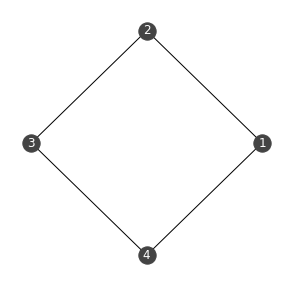

In [8]:
G = nx.Graph()

num_list = [1,2,3,4]
edge = [(1,2), (2,3), (3,4), (4,1)]

#adding all the numbers as node: 2-Regular
G.add_nodes_from(num_list)
G.add_edges_from(edge)

basic_graph,ax = plt.subplots(1,1,figsize = (5,5))
nx.draw(G,
        ax=ax, 
        pos=nx.kamada_kawai_layout(G),
        with_labels=True, 
        node_color='#444444',
        font_color="white")

In [9]:
## for the above 2-regular graph, adjacency matrix will be as below:
adj_G = np.matrix([[0,1,0,1],
                   [1,0,1,0],
                   [0,1,0,1],
                   [1,0,1,0]])

eig_G = np.round(np.linalg.eigvals(adj_G))
print("Eigen values of graph adj_G: ",eig_G)
print("Mininum eigen value of adj_G:", min(eig_G))
if min(eig_G) == -2:
    print("Voila, You did it!!")
else:
    print("Try Again! You can do it!")

Eigen values of graph adj_G:  [-2.  0.  2.  0.]
Mininum eigen value of adj_G: -2.0
Voila, You did it!!


### Question (h)
Show that the following graph, called the Petersen Graph, is $3$-regular by finding its eigenvalues. 

<img src="https://www.researchgate.net/profile/Paul_Wenger/publication/45714891/figure/fig1/AS:669480808091681@1536628071715/The-Petersen-graph.png" width=20%>

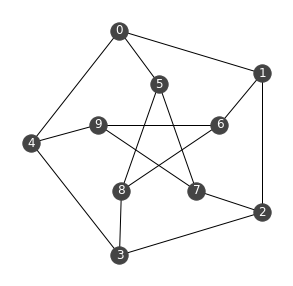

In [10]:
G = nx.Graph()
num_list = [0,1,2,3,4,5,6,7,8,9]
edge = [(0,1),(1,2),(2,3),(3,4),(4,0),(4,9),(0,5),(1,6),
        (2,7),(3,8),(5,7),(5,8),(6,9),(6,8),(7,9)]

#adding all the numbers as node: 2-Regular
G.add_nodes_from(num_list)
G.add_edges_from(edge)

basic_graph,ax = plt.subplots(1,1,figsize = (5,5))
shells = [[5,9,8,7,6],[4,3,2,1,0]]
nx.draw(G,
    ax=ax, 
    pos=nx.shell_layout(G,shells),
    with_labels=True, 
    node_color='#444444',
    font_color="white")

In [11]:
adj_H = np.matrix([[0,1,0,0,1,1,0,0,0,0],
                   [1,0,1,0,0,0,1,0,0,0],
                   [0,1,0,1,0,0,0,1,0,0],
                   [0,0,1,0,1,0,0,0,1,0],
                   [1,0,0,1,0,0,0,0,0,1],
                   [1,0,0,0,0,0,0,1,1,0],
                   [0,1,0,0,0,0,0,0,1,1],
                   [0,0,1,0,0,1,0,0,0,1],
                   [0,0,0,1,0,1,1,0,0,0],
                   [0,0,0,0,1,0,1,1,0,0]])

### for verification
for i in range(0,10):
    l = adj_H[i].tolist()
    print('For node %d:' %i, [i for i, e in enumerate(l[0]) if e == 1])

### print max eigen value of adjacency matrix of petersen graph and multiplicity of that eigen value. 
eig_H = np.linalg.eigvals(adj_H)
print('\n')
m = multiplicity(eig_H)
eig_H = np.linalg.eigvals(adj_H)
print("Maximum eigen value of Petersen Graph is: ", max(eig_H))
print("Multiplicity of max eigen value: ",m[max(eig_H)])
print('\033[1m' 'Therefore, Petersen Graph is a 3-regular graph.')

For node 0: [1, 4, 5]
For node 1: [0, 2, 6]
For node 2: [1, 3, 7]
For node 3: [2, 4, 8]
For node 4: [0, 3, 9]
For node 5: [0, 7, 8]
For node 6: [1, 8, 9]
For node 7: [2, 5, 9]
For node 8: [3, 5, 6]
For node 9: [4, 6, 7]


Unique eigen values are:  [-2.  1.  3.]
Maximum eigen value of Petersen Graph is:  3.0
Multiplicity of max eigen value:  1
Therefore, Petersen Graph is a 3-regular graph.


### Question (i)
Show that if both $n \geq k+1$ and $nk$ is even, then there exists a $k$-regular graph of size $n$. 

**Answer** 

If $nk$ is even, and $k$ will be driving $n$, we have following cases:
1. n = 0 or k = 0
2. k is even $\Rightarrow$ n is odd or even
3. k is odd $\Rightarrow$ n is even 


Based on above combinations, we will filter out possible cases for explanation. 

**Case 1:**

For $n = 0:$ Graph doesn't exits. Also, $k$ will be negative, which is not possible.  

For $k = 0: n \geq 1$, Graph will just have nodes with no neighbors. Graphs can be classified as 0-regular graphs. Thus in this case, **k-regular graph of size n exists**. 

**Case 2**

$k$ is even, with $k \geq 2$

Suppose, $G_{n}(k)$ is a connected k-regular graph with vertex set $\{1,2,3,...,n\}$, for some $n \geq k+1 $.

Using the property: if minimum degree of a vertex in a graph X is $\delta \geq 2$, then there exists a path in G containing $\delta$ edges. 

We can assume that, path P is a path in $G_{n}(k)$ containing k edges. Since, k is even, there are $\frac{k}{2}$ vertex disjoint edges $e_i = (u_i,v_i), 1\leq i \leq \frac{k}{2} \;\text{in}\;P$.

$\therefore$ $\bigcup_{1\leq i \leq \frac{k}{2}} \left\{ u_i,v_i \right\}\;$ has k distict verices. Remove the edges, $e_i, 1\leq i\leq \frac{k}{2}$ and add $k$ new edges.


$\therefore$ $\bigcup_{i=1}^{\frac{k}{2}}\left\{(n+1,u_i)\right\} \bigcup \left\{(n+1,v_i)\right\} $

the resulting graph is a connected k-regular graph with vertex set $\{1,2,...,n+1\}$ and is defined to be $G_{n+1}(k)$


**Case 3**
$k$ is odd. 

**Base case:** $k = 1$, this implies, $n \geq 2$ and is even. 

$\therefore n = \{2z:$ where z is natural number$\}$

In this case, as number of nodes are always even. They can always be distributed in two disjoint sets. and each node can be connected one element of set A is connected to exactly one element of set B. 

This can be understood from a simple example, $n = 4$.
set $A = \{1,2\}$ and set $B = \{3,4\}$

edges are from the set, $\{(1,3), (2,4)\}$


**Now for case $k \geq 3$**

Suppose, $G_{n}(k)$ is a connected k-regular graph with vertex set $\{1,2,3,...,n\}$, for some even $n \geq k+1 $. We can use $G_{n}(k)$ to construct a connected k-regular graph $G_{n+2}(k)$ with vertex set $\{1,2,..,n+2\}$ with below process. 

Using the property: if minimum degree of a vertex in a graph X is $\delta \geq 2$, then there exists a path in G containing $\delta$ edges. 

The graph $G_{n}(k)$ contains a path $R_{n}(k) = (r_1,r_2,...,r_{k+1})$ and has k edges $\{(r_j,r_{j+1})\}_{1\leq j \leq k}$. If we remove k-1 edges $\{(r_j,r_{j+1})\}_{1\leq j \leq k-1}$ and add following edges: 

1. For $1\leq j \leq k-1, j $ odd, add the edges $\{(n+1, r_j),(n+1, q_{j+1})\}$

2. For $1\leq j \leq k-1, j $ even, add the edges $\{(n+2, r_j),(n+2, q_{j+1})\}$

3. Add the edge $(n+1, n+2)$

since k is odd, the total number of edges added in $1$ is $k-1$ and so, there are $k-1$ edges with $n+1$ as end vertex after $1$. Simillarly, after step $2\;$ there are $k-1$ edges with $n+2$ as end vertex. and hence, the resulting graph $3$, is a connected k-regular graph with vertex set $\{1,2,...,n+1,n+2\}$ and can be called $G_{n+2}(k)$.



